In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.tests.test_influence
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
from sklearn.preprocessing import StandardScaler


In [2]:
df= pd.read_csv(r"D:\excelr assignments\mlr\data\50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


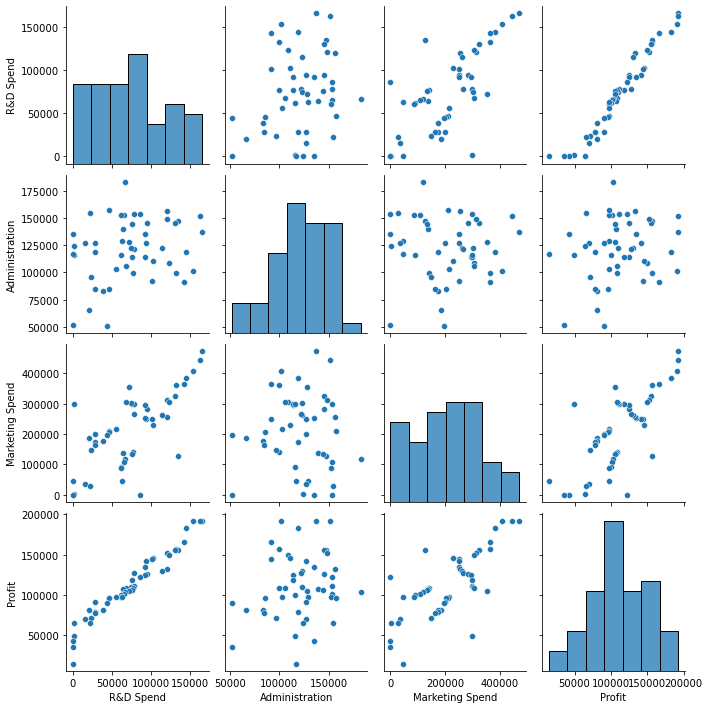

In [4]:
sns.pairplot(df)

<AxesSubplot:>

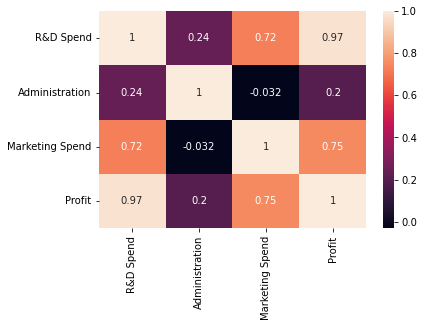

In [6]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [8]:
df = pd.get_dummies(df,columns=['State'])

In [9]:
df.head(1)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.2,136897.8,471784.1,192261.83,0,0,1


In [10]:
X = df[['R&D Spend','Administration', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
Y = df[['Profit']]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

In [14]:
x_train = sm.add_constant(x_train)

In [15]:
x_test = sm.add_constant(x_test)

In [16]:
model = sm.OLS(y_train,x_train).fit()

In [17]:
pred = model.predict(x_test)

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     166.9
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           1.90e-21
Time:                        18:17:29   Log-Likelihood:                -382.59
No. Observations:                  37   AIC:                             777.2
Df Residuals:                      31   BIC:                             786.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.725e+04   4891.324      7.615      0.000    2.73e+04    4.72e+04
R&D Spend            0.7770      0.044     17.592      0.000       0.687       0.867
Administration      -0.0029      0.049     -0.059      0.953      -0.102       0.097
Marketing Spend      0.0323      0.017      1.884      0.069      -0.003       0.067
State_California  1.338e+04   2477.423      5.399      0.000    8323.188    1.84e+04
State_Florida     1.132e+04   2869.969      3.945      0.000    5469.591    1.72e+04
State_New York    1.255e+04   2275.002      5.517      0.000    7910.519    1.72e+04
==============================================================================
Omnibus:                        0.028   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.986   Jarque-Bera (JB):                0.219
Skew:                          -0.014   Prob(JB):                        0.896
Kurtosis:                       2.625   Cond. No.                     1.29e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.71e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
#Multicollinearity is present

In [20]:
influence = model.get_influence()

In [21]:
influence_df = influence.summary_frame()

In [23]:
influence_df.sort_values('cooks_d', ascending=False).head()

,dfb_const,dfb_R&D Spend,dfb_Administration,dfb_Marketing Spend,dfb_State_California,dfb_State_Florida,dfb_State_New York,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
48,-1.222571,-0.155468,0.955757,0.628783,-0.574732,-0.674331,-1.152011,0.251949,-2.085850,0.288441,-1.328023,-2.213101,-1.409042
46,0.152114,0.869837,-0.293688,-0.711600,0.292330,-0.143526,0.189771,0.145887,-1.408592,0.339798,-1.010550,-1.432281,-1.027544
27,0.422461,0.553098,-0.396630,-0.743987,0.460261,0.524500,-0.254579,0.119560,-1.655851,0.233858,-0.914834,-1.706121,-0.942608
14,0.230267,-0.286752,-0.306104,0.166246,0.415821,-0.299538,0.420136,0.111661,-2.234583,0.135347,-0.884096,-2.400021,-0.949551
45,0.172354,-0.259855,0.151485,-0.177991,-0.117696,-0.011104,0.512742,0.102923,1.951803,0.159043,0.848800,2.050162,0.891575


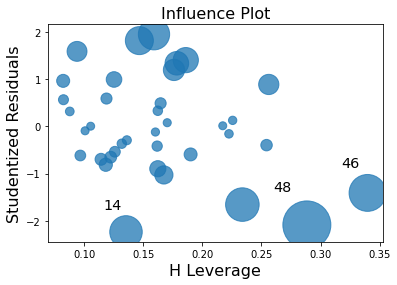

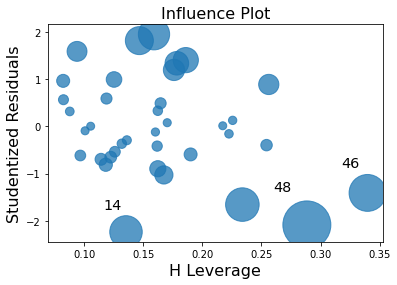

In [24]:
influence.plot_influence()

In [25]:
#Index 48 and 49 have highest Cook's Distance
#Thus it would be better to drop this row from the dataset

In [26]:
vif = pd.DataFrame()

In [29]:
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(len(x_train.columns))]

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [30]:
vif["features"] = x_train.columns

In [31]:
vif

,VIF Factor,features
0,0.000000,const
1,2.333592,R&D Spend
2,1.229401,Administration
3,2.353848,Marketing Spend
4,inf,State_California
5,inf,State_Florida
6,inf,State_New York


In [32]:
#All the values of vif are below 10 hence can be accepted

In [33]:
df.drop(df.index[[46,48]],inplace=True)

In [34]:
x = df[['R&D Spend','Administration', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
y = df[['Profit']]

In [35]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.25)

In [36]:
x_train1 = sm.add_constant(x_train1)

In [37]:
x_test1 = sm.add_constant(x_test1)

In [41]:
model1 = sm.OLS(y_train1,x_train1).fit()

In [42]:
pred = model1.predict(x_test1)

In [43]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     152.1
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           2.28e-20
Time:                        18:27:01   Log-Likelihood:                -371.17
No. Observations:                  36   AIC:                             754.3
Df Residuals:                      30   BIC:                             763.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.255e+04   5916.233      7.193      0.000    3.05e+04    5.46e+04
R&D Spend            0.7580      0.052     14.639      0.000       0.652       0.864
Administration      -0.0505      0.059     -0.851      0.402      -0.172       0.071
Marketing Spend      0.0317      0.019      1.636      0.112      -0.008       0.071
State_California  1.551e+04   2493.216      6.222      0.000    1.04e+04    2.06e+04
State_Florida     1.355e+04   2704.982      5.008      0.000    8022.788    1.91e+04
State_New York    1.349e+04   3097.125      4.356      0.000    7167.378    1.98e+04
==============================================================================
Omnibus:                        0.245   Durbin-Watson:                   2.318
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.442
Skew:                           0.057   Prob(JB):                        0.802
Kurtosis:                       2.470   Cond. No.                     2.99e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.4e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
#Squareroot transformation of X

In [45]:
sq_x_train = np.sqrt(x_train1)
sq_x_test = np.sqrt(x_test1)
sq_y_train = np.sqrt(y_train1)
sq_y_test = np.sqrt(y_test1)

In [46]:
#Square Root Transformation of X

In [47]:
model2 = sm.OLS(y_train1,sq_x_train).fit()

In [48]:
pred2 = model2.predict(sq_x_test)

In [49]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     40.61
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           1.79e-12
Time:                        18:31:06   Log-Likelihood:                -393.15
No. Observations:                  36   AIC:                             798.3
Df Residuals:                      30   BIC:                             807.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.767e+04      2e+04      0.884      0.384   -2.32e+04    5.85e+04
R&D Spend          364.0159     48.663      7.480      0.000     264.632     463.400
Administration     -13.9127     72.729     -0.191      0.850    -162.445     134.620
Marketing Spend      5.4575     29.415      0.186      0.854     -54.616      65.531
State_California  6595.0940   6991.191      0.943      0.353   -7682.823    2.09e+04
State_Florida     4116.8919   7414.752      0.555      0.583    -1.1e+04    1.93e+04
State_New York    6962.3097   8244.508      0.844      0.405   -9875.222    2.38e+04
==============================================================================
Omnibus:                        5.130   Durbin-Watson:                   2.589
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.756
Skew:                           0.882   Prob(JB):                       0.0928
Kurtosis:                       2.762   Cond. No.                     1.23e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.86e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
#Square Root Transformation of Y

In [51]:
model3 = sm.OLS(sq_y_train,x_train1).fit()

In [52]:
pred3 = model3.predict(x_test1)

In [55]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     140.4
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           7.21e-20
Time:                        18:33:08   Log-Likelihood:                -137.58
No. Observations:                  36   AIC:                             287.2
Df Residuals:                      30   BIC:                             296.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              186.7321      8.997     20.755      0.000     168.358     205.106
R&D Spend            0.0011   7.87e-05     13.959      0.000       0.001       0.001
Administration   -6.422e-05   9.02e-05     -0.712      0.482      -0.000       0.000
Marketing Spend   4.767e-05   2.95e-05      1.615      0.117   -1.26e-05       0.000
State_California    62.8485      3.791     16.576      0.000      55.105      70.592
State_Florida       62.8388      4.113     15.276      0.000      54.438      71.240
State_New York      61.0449      4.710     12.961      0.000      51.426      70.664
==============================================================================
Omnibus:                        5.595   Durbin-Watson:                   2.297
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.116
Skew:                          -0.674   Prob(JB):                        0.128
Kurtosis:                       3.963   Cond. No.                     2.99e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.4e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
#Square Root Transformation of X & Y

In [56]:
model4 = sm.OLS(sq_y_train, sq_x_train).fit()
pred4 = model4.predict(sq_x_test)

In [57]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     67.29
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           2.17e-15
Time:                        18:33:59   Log-Likelihood:                -150.03
No. Observations:                  36   AIC:                             312.1
Df Residuals:                      30   BIC:                             321.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              147.4191     23.328      6.319      0.000      99.777     195.062
R&D Spend            0.5397      0.057      9.504      0.000       0.424       0.656
Administration      -0.0181      0.085     -0.213      0.833      -0.191       0.155
Marketing Spend      0.0121      0.034      0.352      0.728      -0.058       0.082
State_California    49.2961      8.158      6.042      0.000      32.635      65.957
State_Florida       47.6467      8.653      5.507      0.000      29.976      65.317
State_New York      50.4764      9.621      5.247      0.000      30.828      70.125
==============================================================================
Omnibus:                        5.107   Durbin-Watson:                   2.490
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                4.152
Skew:                           0.827   Prob(JB):                        0.125
Kurtosis:                       3.178   Cond. No.                     1.23e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.86e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#Model3 is better as it has r2score of 0.959
#Thus the model explains 95.9% of the variance in dependent variable

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

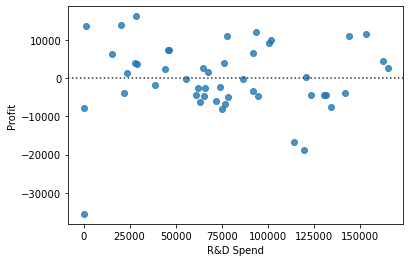

In [59]:
sns.residplot(x='R&D Spend', y='Profit', data=df)

<AxesSubplot:xlabel='Administration', ylabel='Profit'>

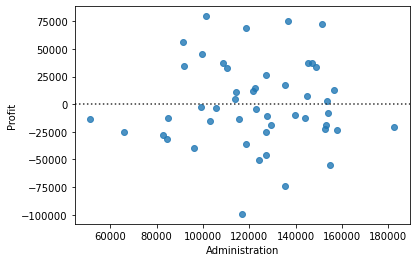

In [60]:
sns.residplot(x='Administration', y='Profit', data=df)

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

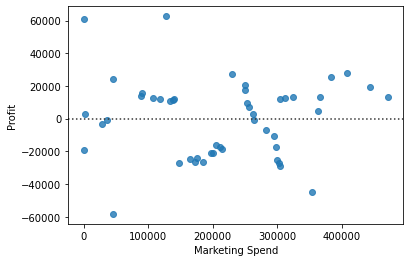

In [61]:
sns.residplot(x='Marketing Spend', y='Profit', data=df)

In [62]:
#We can see that the points are plotted in a randomly spread, there is no pattern and points are not based on one side so there’s no problem of heteroscedasticity.